In [1]:
from triple_stream_data_utils import *


Could not import fluidsynth. AUDIO rendering will not work.


In [2]:
# Make sure you've already ran python CompileStreamsAndFeatures.py

# Available Datasets
available_datasets_path = {
    "candombe": "data/triple_streams/split_2bars/rest/compiled_data/candombe.pkl.bz2",
    "elbg": "data/triple_streams/split_2bars/rest/compiled_data/elbg.pkl.bz2",
    "gmd": "data/triple_streams/split_2bars/rest/compiled_data/groove.pkl.bz2",
    "ttd": "data/triple_streams/split_2bars/rest/compiled_data/taptamdrum.pkl.bz2",
    "lmd": "data/triple_streams/split_2bars/lmd_top_four/compiled_data/lmd.pkl.bz2"
}

In [16]:
dataset_tags = ["elbg"]   # "lmd" is not included here
loaded_datasets = {}

for dataset_tag in dataset_tags:
    # load .pkl.bz2 file
    if dataset_tag in available_datasets_path:
        with bz2.BZ2File(available_datasets_path[dataset_tag], "rb") as f:
            d_dict = pickle.load(f)
            for key, val in d_dict.items():
                if key not in loaded_datasets:
                    loaded_datasets[key] = []
                loaded_datasets[key].extend(val)

print(loaded_datasets.keys())

dict_keys(['input_hvos', 'output_hvos', 'flat_out_hvos', 'sample_id', 'collection', 'all_metadata', 'qpm', 'OF_Input Hamming', 'OF_Input Hamming Accent', 'OS1_OF Jaccard', 'OS2_OF Jaccard', 'OS3_OF Jaccard', 'pearson', 'cosine', 'euclidean_similarity', 'mae_similarity', 'dtw_similarity'])


In [17]:
# sample_ix = 100 # for each sample 24 variations
# input_hvos = loaded_datasets["input_hvos"][sample_ix*24: ((sample_ix+1)*24)]
# output_hvos = loaded_datasets["output_hvos"][sample_ix*24: ((sample_ix+1)*24)]
# metadatas = loaded_datasets["all_metadata"][sample_ix*24: ((sample_ix+1)*24)]
# print(len(input_hvos), len(output_hvos), len(metadatas))
# print(loaded_datasets["OF_Input Hamming"][sample_ix*24: ((sample_ix+1)*24)])
# print(loaded_datasets["OF_Input Hamming Accent"][sample_ix*24: ((sample_ix+1)*24)])
# print(loaded_datasets["OS1_OF Jaccard"][sample_ix*24: ((sample_ix+1)*24)])
# print(loaded_datasets["OS2_OF Jaccard"][sample_ix*24: ((sample_ix+1)*24)])
# print(loaded_datasets["OS3_OF Jaccard"][sample_ix*24: ((sample_ix+1)*24)])
# create_multitab_from_HVO_Sequences(compile_into_list_of_hvo_seqs(input_hvos, output_hvos, metadatas, qpms=None))

In [18]:
gmd_sets = []
for meta in loaded_datasets["all_metadata"]:
    tag = "gmd_"+"_".join(sorted([meta['stream_0'], meta['stream_1'], meta['stream_2'], meta['stream_3']]))
    if tag not in gmd_sets:
        gmd_sets.append(tag)
gmd_sets

['gmd_both_flattened_left_right']

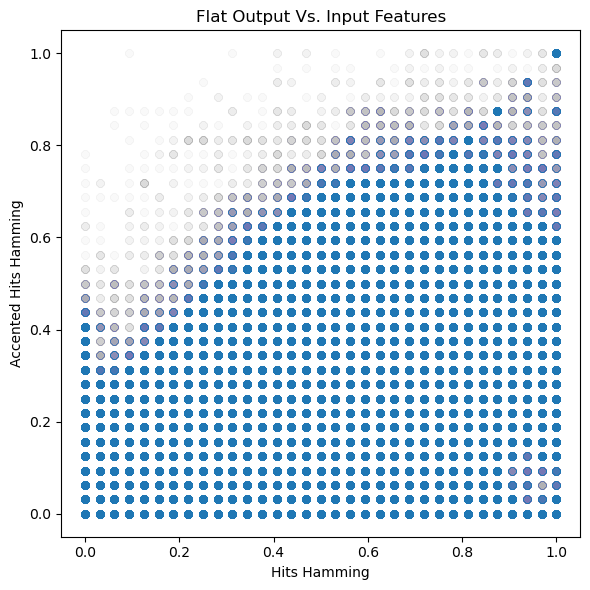

In [11]:
plot_scatter_distribution(
    feat1=loaded_datasets["OF_Input Hamming"],
    feat2=loaded_datasets["OF_Input Hamming Accent"],
    xlabel="Hits Hamming",
    ylabel="Accented Hits Hamming",
    title="Flat Output Vs. Input Features"
)
create_heatmap_histogram_from_lists(
    feat1=loaded_datasets["OF_Input Hamming"],
    feat2=loaded_datasets["OF_Input Hamming Accent"],
    xlabel="Hits Hamming",
    ylabel="Accented Hits Hamming",
    title="Flat Output Vs. Input Features"
)

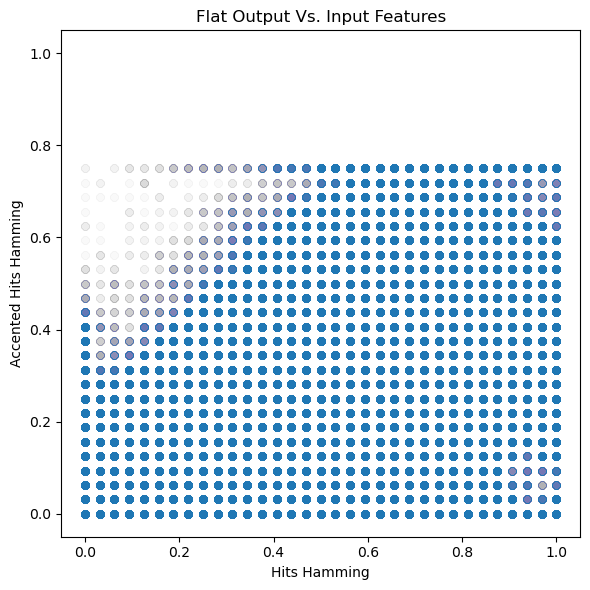

In [16]:
# clip accents at 0.75
clipped_accents = [min(v, 0.75) for v in loaded_datasets["OF_Input Hamming Accent"]]

plot_scatter_distribution(
    feat1=loaded_datasets["OF_Input Hamming"],
    feat2=clipped_accents,
    xlabel="Hits Hamming",
    ylabel="Accented Hits Hamming",
    title="Flat Output Vs. Input Features"
)
create_heatmap_histogram_from_lists(
    feat1=loaded_datasets["OF_Input Hamming"],
    feat2=clipped_accents,
    xlabel="Hits Hamming",
    ylabel="Accented Hits Hamming",
    title="Flat Output Vs. Input Features",
    clip_counts_at=50000,
    saturate_colors_only=True
)
